In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [ ]:
# test drawing
#G = nx.petersen_graph()
#plt.subplot(121)
#nx.draw(G, with_labels=True, font_weight='bold')

In [ ]:
# generate random graph using np, with float weights in [0.0, 1.0)
#num_nodes = 10
#a = np.random.random(size=(num_nodes, num_nodes))
#D = nx.Graph(a)
#nx.draw(D, with_labels=True)

In [ ]:
#test_g1 = nx.fast_gnp_random_graph(15, 0.2)
#nx.draw(test_g1, with_label=True)

In [2]:
# connect cc's in G using # edges == avg of their sizes
def connect_components(G):
    # list of nodes in each connected component
    cc_nodes_list = [list(cc.nodes) for cc in nx.connected_component_subgraphs(G)]
    cc_pairs = itertools.combinations(cc_nodes_list, 2)
    
    for pair in cc_pairs:
        cc1 = pair[0]
        cc2 = pair[1]
        # connect cc1 and cc2 with number of edges == avg of their sizes
        num_edges_to_connect = (len(cc1) + len(cc2)) // 2
        
        for i in range(num_edges_to_connect):
            # choose random vertex in cc1 and cc2
            v1 = np.random.randint(0, len(cc1))
            v2 = np.random.randint(0, len(cc2))
            if not G.has_edge(cc1[v1], cc2[v2]):
                G.add_edge(cc1[v1], cc2[v2])

In [3]:
def assign_edge_weights(G):
    for u in list(G.nodes()):
        for v in list(G.nodes()):
            if (G.has_edge(u,v)):
                edge_weight = round(np.random.uniform(0,100), 3)
                G[u][v]['weight'] = edge_weight

In [4]:
def gen_random_subg(num_verts, sparsity):
    rg = nx.fast_gnp_random_graph(num_verts, sparsity)
    nx.draw(rg, with_labels=True)
    return rg

In [5]:
sparsities = [0.2, 0.8, 0.3, 0.7, 0.5, 0.6]
# num_subgraphs divisible by num_verts
def gen_random_graph(num_verts, num_subgraphs):
    subgraph_size = num_verts // num_subgraphs
    subgraphs_list = [gen_random_subg(subgraph_size, sparsities[i % 6]) for i in range(num_subgraphs)]
    
    # union all subgraphs
    prefixes = [str(i)+'-' for i in range (num_subgraphs)]
    G = nx.union_all(subgraphs_list, rename=tuple(prefixes))
    
    connect_components(G)
    assign_edge_weights(G)
    G = nx.convert_node_labels_to_integers(G)
    return G

/Users/cynthiazhong/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


True

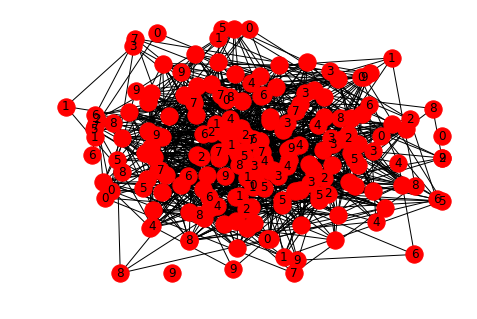

In [6]:
# gen graph with 100 vertices
g100 = gen_random_graph(100, 10)
nx.draw(g100, with_label=True)
nx.is_connected(g100)

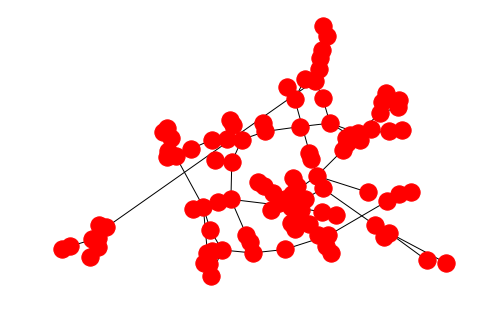

In [7]:
# find mst
T100 = nx.minimum_spanning_tree(g100)
nx.draw(T100, with_label=True)

In [8]:
# change mst leaf edges to smaller weight
def shrink_mst_leaves(G, T):
    for u in list(T.nodes()):
        neighbor_nodes = list(nx.neighbors(T, u))
        if len(neighbor_nodes) == 1:
            v = neighbor_nodes[0]
            edge_weight = round(np.random.uniform(1,10), 3)
            G[u][v]['weight'] = edge_weight

In [ ]:
shrink_mst_leaves(g100, T100)

In [11]:
def create_input_file(G, input_size_cap):
    filename = str(input_size_cap)+'.in'
    
    nx.write_weighted_edgelist(G, 'edges'+str(input_size_cap)+'.in')
    
    f = open(filename, "w+")
    
    num_nodes = G.number_of_nodes()
    f.write(str(num_nodes))
    f.write('\n')

    # prvents newline at EOF
    num_edges = G.number_of_edges()
    g = open('edges'+str(input_size_cap)+'.in', "r")
    lines = g.read().splitlines()
    for i in range(num_edges - 1):
        f.write(lines[i])
        f.write('\n')
    f.write(lines[num_edges - 1])
    
    f.close()
    g.close()

In [12]:
create_input_file(g100, 100)

True

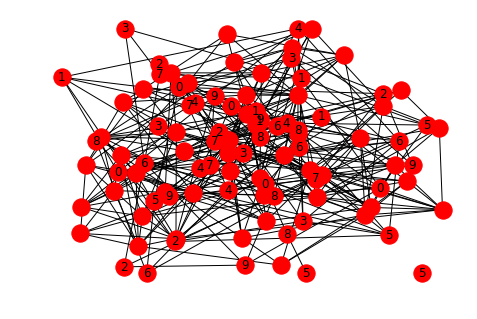

In [14]:
# gen graph with 50 vertices
g50 = gen_random_graph(50, 5)
nx.draw(g50, with_label=True)
nx.is_connected(g50)

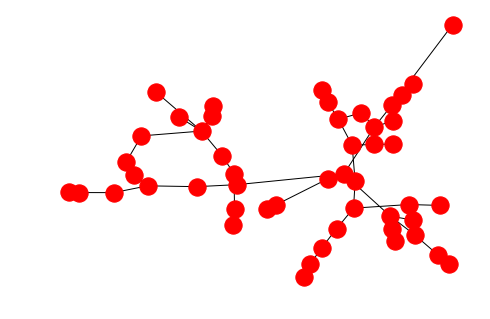

In [15]:
# find mst
T50 = nx.minimum_spanning_tree(g50)
nx.draw(T50, with_label=True)

In [16]:
shrink_mst_leaves(g50, T50)

In [17]:
create_input_file(g50, 50)